In [35]:
### Sorting data

In [1]:
import pandas as pd
import numpy as np
# Load data
df_raw = pd.read_csv("data.csv", index_col=[0])
# Drop empty column
df_raw=df_raw.drop('Unnamed: 32', axis=1)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Turn B and M into 0 and 1
one_hot_df = pd.get_dummies(df_raw, drop_first=True)

In [3]:
one_hot_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
# Set target and features
target = one_hot_df['diagnosis_M']
one_hot_df_indep = one_hot_df.drop('diagnosis_M', axis=1)

In [5]:
# Standardise the One-hot encoded features

std_features = (one_hot_df_indep.apply(lambda x : (x - np.mean(x)) / np.std(x)))
std_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [6]:
# Split into train and test data
from sklearn.model_selection import train_test_split, GridSearchCV

X = one_hot_df_indep.values

X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2, random_state = 42)

In [7]:
### Logistic Regression

In [8]:
# Add Logistic Regression
from sklearn.linear_model import LogisticRegression

In [9]:
# Fit model (default)
logisticRegressor = LogisticRegression()
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [10]:
# Test default model

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.956140350877193
Precision Score : 0.975
Recall Score : 0.9069767441860465
F1 Score : 0.9397590361445783
Confusion Matrix : 
[[70  1]
 [ 4 39]]


In [12]:
## Hyperparameter

In [13]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf_grid = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],
               'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, 
                            param_grid = grid_values,
                            scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

grid_result = grid_clf_acc.fit(X_train, y_train)

C:\Users\melit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\melit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
# Test Grid model

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_acc)))

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Accuracy Score : 0.9736842105263158
Precision Score : 1.0
Recall Score : 0.9302325581395349
F1 Score : 0.963855421686747
Confusion Matrix : 
[[71  0]
 [ 3 40]]
Best Score:  0.9408183921341815
Best Params:  {'C': 10, 'penalty': 'l1'}


In [15]:
lr_params = grid_result.best_params_
lr_params

{'C': 10, 'penalty': 'l1'}

In [16]:
### Working with model

In [17]:
# Model
lr_values = LogisticRegression(random_state = 42,
                            C=lr_params['C'], 
                            class_weight={1: 0.4, 0: 0.6}, 
                            penalty=lr_params['penalty'], 
                            solver='liblinear')
lr_clf = GridSearchCV(clf, 
                            param_grid = grid_values,
                            scoring = 'recall')
lr_clf.fit(X_train, y_train)
# Fit your logistic regression model to your train model
lr_values.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_model = lr_values.predict(X_test)

model_result = lr_values.fit(X_train, y_train)

C:\Users\melit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
# Test model

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_model)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_model)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_model)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_model)))

#Logistic Regression (Grid Search) Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_model)))

Accuracy Score : 0.9736842105263158
Precision Score : 1.0
Recall Score : 0.9302325581395349
F1 Score : 0.963855421686747
Confusion Matrix : 
[[71  0]
 [ 3 40]]


In [19]:
# Classification report full (B & M)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [20]:
# Predict labels on your Test set of independent variables
pred_logit = lr_values.predict(X_test)
# Predict probabilities on your Test set of independent variables
proba_logit = lr_values.predict_proba(X_test)

In [21]:
pred_logit
proba_logit

array([[9.28205303e-01, 7.17946970e-02],
       [2.58506327e-10, 1.00000000e+00],
       [8.71853645e-04, 9.99128146e-01],
       [9.99829697e-01, 1.70302735e-04],
       [9.99981247e-01, 1.87529545e-05],
       [6.46571685e-12, 1.00000000e+00],
       [3.55271368e-15, 1.00000000e+00],
       [4.82246692e-03, 9.95177533e-01],
       [9.97777032e-01, 2.22296752e-03],
       [9.98407379e-01, 1.59262136e-03],
       [9.77234827e-01, 2.27651729e-02],
       [2.33014419e-04, 9.99766986e-01],
       [9.98183206e-01, 1.81679420e-03],
       [2.01790860e-01, 7.98209140e-01],
       [9.99092433e-01, 9.07566709e-04],
       [4.70650463e-04, 9.99529350e-01],
       [9.99512541e-01, 4.87459007e-04],
       [9.99996384e-01, 3.61566660e-06],
       [9.99925464e-01, 7.45356110e-05],
       [5.76951154e-10, 9.99999999e-01],
       [9.59921782e-01, 4.00782176e-02],
       [9.99020370e-01, 9.79629752e-04],
       [1.28408395e-12, 1.00000000e+00],
       [9.99425228e-01, 5.74772107e-04],
       [9.981950

In [22]:
#confusion matrix from CFG -> I'd leave that one as it got %
print("Confusion Matrix")
table = pd.crosstab(y_test, pred_logit)
print(table)
print("")

print("Confusion Matrix in percentges")
table = pd.crosstab(y_test, pred_logit) / len(y_test)
print(table)

Confusion Matrix
col_0         0   1
diagnosis_M        
0            71   0
1             3  40

Confusion Matrix in percentges
col_0               0         1
diagnosis_M                    
0            0.622807  0.000000
1            0.026316  0.350877


In [23]:
#  Add plotting
import matplotlib.pyplot as plt

AUC : 0.9651162790697674


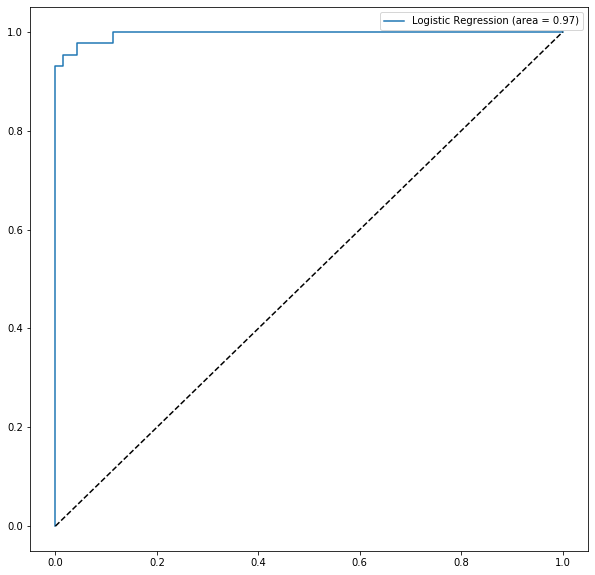

In [24]:
# AUC from CFG -> I'd leave that one as it got graph
from sklearn.metrics import roc_auc_score, roc_curve
#roc curve
auc = roc_auc_score(y_test, pred_logit)
print("AUC : " + str(auc))
fpr, tpr, thresholds = roc_curve(y_test, proba_logit[:,1], pos_label=1)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='best')
plt.show()

In [25]:
# Comparison Actual vs. Predicted
df2 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_model.flatten()})
df2

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
109,0,0
110,1,1
111,0,0
112,0,0


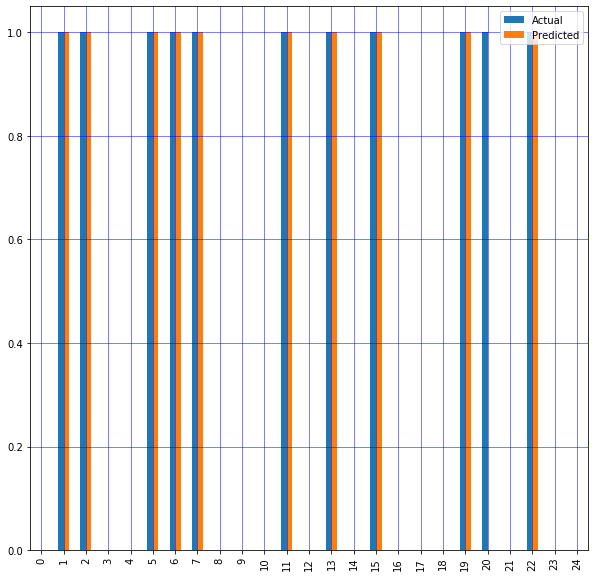

In [26]:
# Visualise comparison
df1 = df2.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()

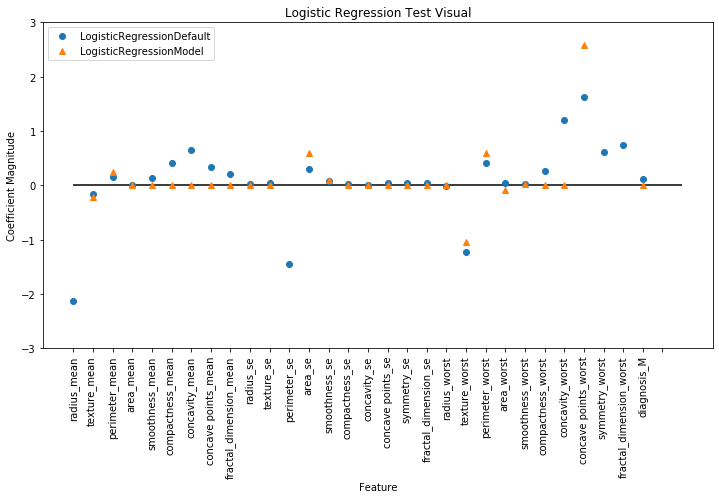

In [28]:
# Plotting all default and modeled (best params) resoults
import matplotlib.pyplot as plt 
one_hot_df_features = [x for i,x in enumerate(one_hot_df.columns) if i!=8]

plt.figure(figsize=(12,6))
plt.plot(clf.coef_.T, 'o', label="LogisticRegressionDefault")
plt.plot(lr_values.coef_.T, '^', label="LogisticRegressionModel")
plt.xticks(range(one_hot_df.shape[1]), one_hot_df_features, rotation=90)
plt.hlines(0, 0, one_hot_df.shape[1])
plt.ylim(-3, 3)
plt.title('Logistic Regression Test Visual')
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.legend()
plt.show()

In [29]:
# Visualising data we started with
# Make the X and y numpy arrays,
# containing the values of
# Radius and Texture
X = np.vstack((np.asarray(one_hot_df.radius_mean.values), \
               np.asarray(one_hot_df.texture_mean.values)))
y = np.asarray(one_hot_df.diagnosis_M.values)

Text(0, 0.5, 'texture_mean')

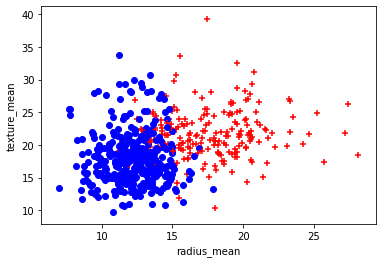

In [30]:
# Plot the data (below tells  everything 0 -what we coded B (Benigns) is blue, reds coded 1 are M or Malignants. 
for i in range(len(y)):
    if y[i]==0:
        c = 'blue'
        m = u'o'
    if y[i]==1:
        c = 'red'
        m = u'+'
    plt.scatter(X[0][i], X[1][i], color=c, marker=m)
    
# Put labels
plt.xlabel(one_hot_df.columns[one_hot_df.columns.get_loc("radius_mean")])
plt.ylabel(one_hot_df.columns[one_hot_df.columns.get_loc("texture_mean")])

In [31]:
### Work to test accuracy and make predictions
# below is all longer version to model data, guess it can be removed
# wanted to use it to see how predicting works in reality as there were no examples with models above

# The Logistic Function
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [32]:
# Logistic Regression Cost Function ->tells us how problematic are our wrong predictions
def calcCostFunction(theta, X, y):
    
    # number of training examples
    m,n = X.shape  
    
    # Calculate h = X * theta (we are using vectorized version)
    h = X.dot(theta) 
    
    # Calculate the Cost J
    J = -(np.sum(y * np.log(sigmoid(h)) + (1 - y) * np.log(1 - sigmoid(h)))/m)
    return J

In [33]:
# The Gradient Function ->this one should help calculate model with smallest J (J = cost)
def calcGradient(theta, X, y):
    
    # number of training examples
    m,n = X.shape    
    
    # Calculate h = X * theta
    h = X.dot(theta)
    
    # Calculate the error = (h - y)
    error = sigmoid(h) - y
    
    # Calculate the new theta
    gradient = 1/m * (X.T).dot(error)
    
    return gradient

In [34]:
## Normalisation

In [35]:
# The Scaling and Normalization
# for two variables

def FeatureScalingNormalization(X):
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # Initialize mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    
    # Initialize sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    # mu (mean)
    mu = np.vstack((X[0].mean(), \
                    X[1].mean()))

    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1)))     

    # Number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

In [36]:
# Calculate the accuracy
def CalcAccuracy(theta, X):
    p = sigmoid(X.dot(theta)) >= 0.5
    return p

In [37]:
# Normalize X using the FeatureScalingNormalization function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalization(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]

In [38]:
# Add a column of 'ones' to X

# number of training examples
m = len(y) 

# number of features
n = len(X)

# Add a column of ones to the X matrix
X = np.vstack((np.ones(m), X)).T

In [39]:
### Testing
# First test: Compute cost and gradient, 
# and display the updated theta starting with initial theta = [0, 0, 0]

initial_theta = np.zeros(n+1); # set theta = [0, 0, 0]

print ("J (or Cost) =", calcCostFunction(theta=initial_theta, X=X, y=y))

print ("Gradient =", calcGradient(theta=initial_theta, X=X, y=y))

J (or Cost) = 0.6931471805599453
Gradient = [ 0.12741652 -0.35265304 -0.20056252]


In [40]:
import scipy.optimize as op 
# Gradient Descent Advanced Optimization: BFGS
# Update and find the optimal theta
m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = calcCostFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'BFGS',
                                 jac = calcGradient);
theta = Result.x;
Result

      fun: 0.2558201286363281
 hess_inv: array([[12.66527269, -1.22908954, -2.82539649],
       [-1.22908954, 71.16261306,  7.07658929],
       [-2.82539649,  7.07658929, 13.39777084]])
      jac: array([7.36409258e-07, 3.24760454e-08, 9.55291040e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([-0.70755981,  3.72528774,  0.93824469])

Text(0, 0.5, 'texture_mean')

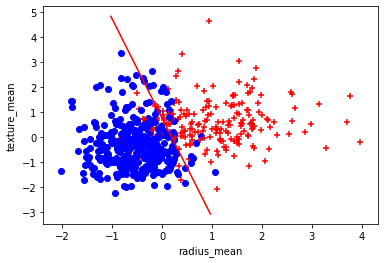

In [41]:
# Plot the data with the 
# Logistic Regression Decision Boundary

# Create a plot set
plot_x = np.asarray([X.T[1].min()+1, X.T[1].max()-3])

# Calculate the Decision Boundary
plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

for i in range(len(y)):
    if y[i]==0:
        c = 'blue'
        m = u'o'
    if y[i]==1:
        c = 'red'
        m = u'+'
    plt.scatter(X.T[1][i], X.T[2][i], color=c, marker=m) 
    
# Plot the Decision Boundary (red line)
plt.plot(plot_x, plot_y, color='red')

# Put labels
plt.xlabel(one_hot_df.columns[one_hot_df.columns.get_loc("radius_mean")])
plt.ylabel(one_hot_df.columns[one_hot_df.columns.get_loc("texture_mean")])

In [42]:
# Calculate accuracy
p = CalcAccuracy(theta, X)
p = (p == y) * 100
print ("Train Accuracy:", p.mean())

Train Accuracy: 89.103690685413


In [43]:
### PREDICTIONS

In [43]:
# Perform a Query:
# Predict the risk of malignancy for Radius = 18.00 and Texture = 10.12

query = np.asarray([1, 18.00, 10.12])

# Scale and Normalize the query
query_Normalized = \
np.asarray([1, ((query[1]-float(mu[0]))/float(sigma[0])),\
                               ((query[2]-float(mu[1]))/float(sigma[1]))])


prediction = sigmoid(query_Normalized.dot(theta));
prediction

0.7999520268226942